## 0 또는 1을 예측하는 양방향 LSTM 모델의 제작

In [21]:
import warnings
warnings.filterwarnings(action='ignore')

import time
from random import random

import numpy as np
import pandas as pd

from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.layers import Flatten, LSTM, SimpleRNN
from tensorflow.keras.layers import Bidirectional, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline

In [22]:
# 하이퍼파라미터 정의
n_units = 20
n_timesteps = 4 # 4개의 데이터로 1개를 예측

In [23]:
range(n_timesteps)

range(0, 4)

In [24]:
# 0~1 사이의 랜덤 시퀀스 생성
X = np.array([random() for _ in range(n_timesteps)])  
print(X)

[0.54417925 0.99540575 0.08654178 0.55131781]


In [25]:
limit = n_timesteps / 4.0  # 클래스 분류 기준
print(limit)

1.0


In [26]:
np.cumsum(X)  # 누적합, 0, 0+1, 0+1+2, 0+1+2+3

array([0.54417925, 1.53958499, 1.62612678, 2.17744459])

In [27]:
print([0 if x < limit else 1 for x in np.cumsum(X)])

[0, 1, 1, 1]


In [28]:
# 누적합 시퀀스에서 클래스 결정
# 누적합 항목이 limit보다 작은 경우 0, 아닌 경우 1로 분류
y = np.array([0 if x < limit else 1 for x in np.cumsum(X)])
print(y)

[0 1 1 1]


In [29]:
# LSTM 입력을 위해 3차원 텐서 형태로 변경
X = X.reshape(1, n_timesteps, 1) # 1면 4행 1열
y = y.reshape(1, n_timesteps, 1)
print(X)
print()
print(y)

[[[0.54417925]
  [0.99540575]
  [0.08654178]
  [0.55131781]]]

[[[0]
  [1]
  [1]
  [1]]]


In [30]:
# 시퀀스 생성
# n_timesteps: 입력 시퀀스 길이
def get_sequence(n_timesteps):
    # 0~1 사이의 랜덤 시퀀스 생성
    X = np.array([random() for _ in range(n_timesteps)])

    # 클래스 분류 기준
    limit = n_timesteps / 4.0

    # 누적합 시퀀스에서 클래스 결정
    # 누적합 항목이 limit보다 작은 경우 0, 아닌 경우 1로 분류
    y = np.array([0 if x < limit else 1 for x in np.cumsum(X)])

    # LSTM 입력을 위해 3차원 텐서 형태로 변경
    X = X.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)
    return X, y

In [31]:
# 양방향 LSTM 모델 정의, Bidirectional 래퍼 사용
# TimeDistributed: LSTM이 many-to-many로 동작됨
model = Sequential()
# units=10: rnn 계층에 존재하는 전체 뉴런수
# return_sequences=True: 양방향 LSTM에서는 필수로 True
# input_shape=(n_timesteps, n_features): 입력 시퀀스 길이, 변수의 갯수
model.add(Bidirectional(LSTM(n_units, return_sequences=True, input_shape=(n_timesteps, 1))))
# Dense가 3차원 데이터를 받을 수 있도록 처리함.
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

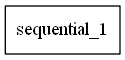

In [32]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [33]:
# 모델 학습
# 에포크마다 학습 데이터를 생성해서 학습
for epoch in range(1000):
    X, y = get_sequence(n_timesteps)
    print('X:', X, '\n y:', y)
    model.fit(X, y, epochs=1, batch_size=1, verbose=1)

X: [[[0.96603132]
  [0.29891181]
  [0.16890724]
  [0.32380535]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 3s 3s/step - loss: 0.7047 - accuracy: 0.2500
X: [[[0.73340893]
  [0.88343042]
  [0.71262259]
  [0.7913772 ]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 6ms/step - loss: 0.7188 - accuracy: 0.2500
X: [[[0.80688452]
  [0.74674282]
  [0.66745797]
  [0.01428959]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 7ms/step - loss: 0.7071 - accuracy: 0.2500
X: [[[0.59855454]
  [0.23195875]
  [0.34230195]
  [0.67491886]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.6957 - accuracy: 0.5000
X: [[[0.09328273]
  [0.81567601]
  [0.46929613]
  [0.01902184]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5000
X: [[[0.90135457]
  [0.92571104]
  [0.51056611]
  [0.31896817]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]


1/1 [==============================] - 0s 4ms/step - loss: 0.6499 - accuracy: 0.7500
X: [[[0.0387227 ]
  [0.21383617]
  [0.91987688]
  [0.23228959]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 9ms/step - loss: 0.6584 - accuracy: 0.7500
X: [[[0.69077596]
  [0.83158855]
  [0.9473372 ]
  [0.40356551]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.6226 - accuracy: 1.0000
X: [[[0.45563807]
  [0.77844238]
  [0.58604331]
  [0.27400804]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 7ms/step - loss: 0.6292 - accuracy: 1.0000
X: [[[0.63853844]
  [0.92086501]
  [0.74090632]
  [0.49140594]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.6183 - accuracy: 1.0000
X: [[[0.15214768]
  [0.82802089]
  [0.89011129]
  [0.45268246]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 8ms/step - loss: 0.6376 - accuracy: 0.7500
X: [[[0.16

1/1 [==============================] - 0s 5ms/step - loss: 0.5451 - accuracy: 0.7500
X: [[[0.69957802]
  [0.36235293]
  [0.05623727]
  [0.25330741]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.5237 - accuracy: 0.7500
X: [[[0.11943312]
  [0.74816145]
  [0.64534096]
  [0.13871278]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.5562 - accuracy: 0.7500
X: [[[0.71765235]
  [0.35632131]
  [0.29539241]
  [0.35036974]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.5061 - accuracy: 1.0000
X: [[[0.62416218]
  [0.62412544]
  [0.7158781 ]
  [0.6019847 ]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.4748 - accuracy: 1.0000
X: [[[0.98626442]
  [0.05500343]
  [0.14637139]
  [0.50311745]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.5074 - accuracy: 0.7500
X: [[[0.56

1/1 [==============================] - 0s 6ms/step - loss: 0.3115 - accuracy: 1.0000
X: [[[0.92670864]
  [0.21232267]
  [0.41652914]
  [0.54585723]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 1.0000
X: [[[0.11014423]
  [0.30740182]
  [0.68202994]
  [0.34107761]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 8ms/step - loss: 0.3424 - accuracy: 1.0000
X: [[[0.60893542]
  [0.37441637]
  [0.36958507]
  [0.0630655 ]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 6ms/step - loss: 0.4120 - accuracy: 0.7500
X: [[[0.75569085]
  [0.39912005]
  [0.32477373]
  [0.55514775]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 9ms/step - loss: 0.3056 - accuracy: 1.0000
X: [[[0.1490967 ]
  [0.27010378]
  [0.1854857 ]
  [0.33879484]]] 
 y: [[[0]
  [0]
  [0]
  [0]]]
1/1 [==============================] - 0s 4ms/step - loss: 1.0794 - accuracy: 0.2500
X: [[[0.72

1/1 [==============================] - 0s 5ms/step - loss: 0.5314 - accuracy: 0.7500
X: [[[0.05275386]
  [0.75409924]
  [0.40443116]
  [0.02044768]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.2713 - accuracy: 1.0000
X: [[[0.71437865]
  [0.96755863]
  [0.84663127]
  [0.55989553]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.3295 - accuracy: 0.7500
X: [[[0.19745375]
  [0.91674438]
  [0.63674858]
  [0.63982923]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.4146 - accuracy: 0.7500
X: [[[0.55692467]
  [0.61485017]
  [0.07891952]
  [0.91828046]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.4095 - accuracy: 0.7500
X: [[[0.86621158]
  [0.08219031]
  [0.53497454]
  [0.52315461]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.2016 - accuracy: 1.0000
X: [[[0.22

1/1 [==============================] - 0s 6ms/step - loss: 0.3617 - accuracy: 0.7500
X: [[[0.20298767]
  [0.21800375]
  [0.25140612]
  [0.54412404]]] 
 y: [[[0]
  [0]
  [0]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.4713 - accuracy: 0.7500
X: [[[0.00578972]
  [0.79420188]
  [0.88317676]
  [0.96986402]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1450 - accuracy: 1.0000
X: [[[0.37108748]
  [0.32906378]
  [0.04546837]
  [0.23002488]]] 
 y: [[[0]
  [0]
  [0]
  [0]]]
1/1 [==============================] - 0s 4ms/step - loss: 1.3292 - accuracy: 0.5000
X: [[[0.7411238 ]
  [0.86601808]
  [0.39229489]
  [0.45197755]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 7ms/step - loss: 0.2260 - accuracy: 1.0000
X: [[[0.01625725]
  [0.55094094]
  [0.32183881]
  [0.313328  ]]] 
 y: [[[0]
  [0]
  [0]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.5097 - accuracy: 0.7500
X: [[[0.31

1/1 [==============================] - 0s 5ms/step - loss: 0.2461 - accuracy: 0.7500
X: [[[3.15433800e-01]
  [8.87686962e-01]
  [5.25875664e-04]
  [4.27172892e-01]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.2159 - accuracy: 1.0000
X: [[[0.02559613]
  [0.70228257]
  [0.17195549]
  [0.27434741]]] 
 y: [[[0]
  [0]
  [0]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.6412 - accuracy: 0.5000
X: [[[0.595863  ]
  [0.21373014]
  [0.54414603]
  [0.73495812]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1910 - accuracy: 1.0000
X: [[[0.08581787]
  [0.39351691]
  [0.60600047]
  [0.77408847]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1789 - accuracy: 1.0000
X: [[[0.65435731]
  [0.72738815]
  [0.73190401]
  [0.11285847]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 6ms/step - loss: 0.1717 - accuracy: 1

1/1 [==============================] - 0s 4ms/step - loss: 0.2427 - accuracy: 0.7500
X: [[[0.67538793]
  [0.77699907]
  [0.08909369]
  [0.50235732]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1895 - accuracy: 1.0000
X: [[[0.81751805]
  [0.44261089]
  [0.34205671]
  [0.38495415]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.1990 - accuracy: 1.0000
X: [[[0.44977039]
  [0.26673043]
  [0.78818595]
  [0.33762016]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1712 - accuracy: 1.0000
X: [[[0.89223756]
  [0.50465939]
  [0.93213439]
  [0.36271053]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.1980 - accuracy: 1.0000
X: [[[0.90651938]
  [0.08513939]
  [0.26734381]
  [0.80248894]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1593 - accuracy: 1.0000
X: [[[0.94

1/1 [==============================] - 0s 4ms/step - loss: 0.4809 - accuracy: 0.7500
X: [[[0.90678473]
  [0.52950134]
  [0.00946952]
  [0.84874031]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.2673 - accuracy: 0.7500
X: [[[0.08691195]
  [0.94825306]
  [0.80024044]
  [0.99254058]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.4001 - accuracy: 0.7500
X: [[[0.06093674]
  [0.66394827]
  [0.45891664]
  [0.38825059]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.1788 - accuracy: 1.0000
X: [[[0.07009329]
  [0.08509839]
  [0.97138985]
  [0.96261792]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1307 - accuracy: 1.0000
X: [[[0.81922817]
  [0.70681991]
  [0.33669732]
  [0.97598439]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.2671 - accuracy: 0.7500
X: [[[0.95

1/1 [==============================] - 0s 6ms/step - loss: 0.5194 - accuracy: 0.7500
X: [[[0.15794876]
  [0.33209839]
  [0.0393877 ]
  [0.39713152]]] 
 y: [[[0]
  [0]
  [0]
  [0]]]
1/1 [==============================] - 0s 8ms/step - loss: 1.1474 - accuracy: 0.5000
X: [[[0.30915284]
  [0.50054572]
  [0.13983104]
  [0.48614489]]] 
 y: [[[0]
  [0]
  [0]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.6050 - accuracy: 0.7500
X: [[[0.54088824]
  [0.85302897]
  [0.70967384]
  [0.8632268 ]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 6ms/step - loss: 0.2292 - accuracy: 0.7500
X: [[[0.59802761]
  [0.15532867]
  [0.29078122]
  [0.73431551]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 6ms/step - loss: 0.1511 - accuracy: 1.0000
X: [[[0.84669846]
  [0.63031291]
  [0.11338052]
  [0.49850036]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1737 - accuracy: 1.0000
X: [[[0.64

1/1 [==============================] - 0s 5ms/step - loss: 0.6113 - accuracy: 0.7500
X: [[[0.00535728]
  [0.59664531]
  [0.95382433]
  [0.02466534]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1924 - accuracy: 1.0000
X: [[[0.62665391]
  [0.49938225]
  [0.89490901]
  [0.85432339]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.3169 - accuracy: 0.7500
X: [[[0.17834367]
  [0.33677384]
  [0.78121616]
  [0.18400278]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1781 - accuracy: 1.0000
X: [[[0.58567187]
  [0.97456988]
  [0.58559529]
  [0.18486631]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.1532 - accuracy: 1.0000
X: [[[0.59085271]
  [0.40430056]
  [0.80086599]
  [0.198627  ]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1905 - accuracy: 1.0000
X: [[[0.10

1/1 [==============================] - 0s 5ms/step - loss: 0.1205 - accuracy: 1.0000
X: [[[0.04410576]
  [0.66892944]
  [0.48455242]
  [0.01522943]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 10ms/step - loss: 0.2314 - accuracy: 1.0000
X: [[[0.61198118]
  [0.27188267]
  [0.79363677]
  [0.18435254]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.1810 - accuracy: 1.0000
X: [[[0.83540365]
  [0.2994108 ]
  [0.62814667]
  [0.33325965]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 7ms/step - loss: 0.2218 - accuracy: 0.7500
X: [[[0.25505793]
  [0.95776109]
  [0.59051967]
  [0.35703417]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.2122 - accuracy: 0.7500
X: [[[0.04393816]
  [0.82409839]
  [0.93073823]
  [0.12722894]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.1962 - accuracy: 1.0000
X: [[[0.0

1/1 [==============================] - 0s 6ms/step - loss: 0.1925 - accuracy: 1.0000
X: [[[0.03215735]
  [0.92437481]
  [0.38246497]
  [0.78132198]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 6ms/step - loss: 0.1586 - accuracy: 1.0000
X: [[[0.63092869]
  [0.97651856]
  [0.52223828]
  [0.40295261]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1321 - accuracy: 1.0000
X: [[[0.13888928]
  [0.09419972]
  [0.24593897]
  [0.46076391]]] 
 y: [[[0]
  [0]
  [0]
  [0]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.7797 - accuracy: 0.5000
X: [[[0.07777295]
  [0.77124389]
  [0.23865413]
  [0.96302131]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.1447 - accuracy: 1.0000
X: [[[0.06581068]
  [0.49261884]
  [0.92815251]
  [0.04021934]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1825 - accuracy: 1.0000
X: [[[0.75

1/1 [==============================] - 0s 5ms/step - loss: 0.1295 - accuracy: 1.0000
X: [[[0.26001862]
  [0.42448664]
  [0.89149327]
  [0.1129117 ]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 9ms/step - loss: 0.1669 - accuracy: 1.0000
X: [[[0.11629869]
  [0.32030155]
  [0.76962959]
  [0.13857959]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1681 - accuracy: 1.0000
X: [[[0.05927562]
  [0.67745729]
  [0.67322709]
  [0.30952277]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.1650 - accuracy: 1.0000
X: [[[0.48017514]
  [0.62013264]
  [0.71701537]
  [0.1880208 ]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1899 - accuracy: 1.0000
X: [[[0.7442141 ]
  [0.28505115]
  [0.83907299]
  [0.51333442]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 6ms/step - loss: 0.2527 - accuracy: 0.7500
X: [[[0.50

1/1 [==============================] - 0s 5ms/step - loss: 0.2715 - accuracy: 0.7500
X: [[[0.29899   ]
  [0.16177466]
  [0.04651946]
  [0.27813423]]] 
 y: [[[0]
  [0]
  [0]
  [0]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.8885 - accuracy: 0.5000
X: [[[0.73302924]
  [0.89586617]
  [0.96656777]
  [0.69925203]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1176 - accuracy: 1.0000
X: [[[0.91427058]
  [0.68483832]
  [0.66309056]
  [0.61884385]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1250 - accuracy: 1.0000
X: [[[3.64523810e-04]
  [1.49005189e-01]
  [8.42220102e-01]
  [9.41656263e-01]]] 
 y: [[[0]
  [0]
  [0]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.3870 - accuracy: 0.7500
X: [[[0.89469277]
  [0.63668446]
  [0.61149084]
  [0.21650478]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1039 - accuracy: 1

1/1 [==============================] - 0s 5ms/step - loss: 0.1464 - accuracy: 1.0000
X: [[[0.53624947]
  [0.18428466]
  [0.29379848]
  [0.83374943]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1278 - accuracy: 1.0000
X: [[[0.49588917]
  [0.22201128]
  [0.62664535]
  [0.9307681 ]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1127 - accuracy: 1.0000
X: [[[0.5781316 ]
  [0.70652572]
  [0.98646602]
  [0.1255264 ]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1046 - accuracy: 1.0000
X: [[[0.84255095]
  [0.26234986]
  [0.44402239]
  [0.01977888]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1400 - accuracy: 1.0000
X: [[[0.24760177]
  [0.35080457]
  [0.760656  ]
  [0.39357173]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1539 - accuracy: 1.0000
X: [[[0.07

1/1 [==============================] - 0s 8ms/step - loss: 0.1774 - accuracy: 1.0000
X: [[[0.51173376]
  [0.16283453]
  [0.60576411]
  [0.02257872]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1920 - accuracy: 1.0000
X: [[[0.2324144 ]
  [0.88642356]
  [0.94041801]
  [0.01430898]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1365 - accuracy: 1.0000
X: [[[0.80067669]
  [0.84798575]
  [0.27519896]
  [0.72928423]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 8ms/step - loss: 0.1239 - accuracy: 1.0000
X: [[[0.40790392]
  [0.9575106 ]
  [0.63676709]
  [0.43705058]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 8ms/step - loss: 0.1351 - accuracy: 1.0000
X: [[[0.39809978]
  [0.17554608]
  [0.83705877]
  [0.20738492]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1459 - accuracy: 1.0000
X: [[[0.48

1/1 [==============================] - 0s 5ms/step - loss: 0.1212 - accuracy: 1.0000
X: [[[0.17912554]
  [0.58326681]
  [0.05958249]
  [0.5669141 ]]] 
 y: [[[0]
  [0]
  [0]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.5371 - accuracy: 0.7500
X: [[[0.33808033]
  [0.52578987]
  [0.16030748]
  [0.26936284]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 6ms/step - loss: 0.2370 - accuracy: 0.7500
X: [[[0.57070005]
  [0.84866058]
  [0.17874482]
  [0.0597129 ]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.0856 - accuracy: 1.0000
X: [[[0.70610885]
  [0.46924973]
  [0.09125601]
  [0.63615729]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1655 - accuracy: 1.0000
X: [[[0.89253226]
  [0.57122797]
  [0.51556209]
  [0.83673477]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.0979 - accuracy: 1.0000
X: [[[0.90

1/1 [==============================] - 0s 4ms/step - loss: 0.1532 - accuracy: 1.0000
X: [[[0.65737692]
  [0.46391246]
  [0.72392636]
  [0.56542568]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1457 - accuracy: 1.0000
X: [[[0.14780008]
  [0.85717668]
  [0.39376153]
  [0.39786493]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 6ms/step - loss: 0.1881 - accuracy: 1.0000
X: [[[0.94857559]
  [0.80485456]
  [0.81381214]
  [0.19914265]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.0484 - accuracy: 1.0000
X: [[[0.24479965]
  [0.05423393]
  [0.65503588]
  [0.17201095]]] 
 y: [[[0]
  [0]
  [0]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.4981 - accuracy: 0.7500
X: [[[0.38418655]
  [0.91639069]
  [0.41264871]
  [0.19502584]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.0971 - accuracy: 1.0000
X: [[[0.05

1/1 [==============================] - 0s 5ms/step - loss: 0.1515 - accuracy: 1.0000
X: [[[0.2117096 ]
  [0.24315489]
  [0.32260973]
  [0.35136216]]] 
 y: [[[0]
  [0]
  [0]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.4219 - accuracy: 0.7500
X: [[[0.35139455]
  [0.78689066]
  [0.58325338]
  [0.75344189]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1912 - accuracy: 0.7500
X: [[[0.8593635 ]
  [0.26786246]
  [0.82837099]
  [0.96736347]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 7ms/step - loss: 0.1855 - accuracy: 0.7500
X: [[[0.776453  ]
  [0.45753201]
  [0.02056085]
  [0.97769067]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 7ms/step - loss: 0.2360 - accuracy: 0.7500
X: [[[0.03360402]
  [0.532657  ]
  [0.98708585]
  [0.74032276]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.1144 - accuracy: 1.0000
X: [[[0.45

1/1 [==============================] - 0s 7ms/step - loss: 0.1143 - accuracy: 1.0000
X: [[[0.8231611 ]
  [0.61759089]
  [0.85297484]
  [0.81813717]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 8ms/step - loss: 0.0791 - accuracy: 1.0000
X: [[[0.99150498]
  [0.45393825]
  [0.27287016]
  [0.37850599]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 7ms/step - loss: 0.0761 - accuracy: 1.0000
X: [[[0.21599352]
  [0.64842965]
  [0.71820149]
  [0.40975436]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1891 - accuracy: 1.0000
X: [[[0.72170489]
  [0.2982467 ]
  [0.35027331]
  [0.85184728]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.2282 - accuracy: 0.7500
X: [[[0.02473382]
  [0.05036861]
  [0.10202599]
  [0.38456441]]] 
 y: [[[0]
  [0]
  [0]
  [0]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.3324 - accuracy: 1.0000
X: [[[0.44

1/1 [==============================] - 0s 8ms/step - loss: 0.0817 - accuracy: 1.0000
X: [[[0.5612431 ]
  [0.66413156]
  [0.51998744]
  [0.35033221]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.0997 - accuracy: 1.0000
X: [[[0.77787383]
  [0.61673329]
  [0.56762543]
  [0.11441908]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.0556 - accuracy: 1.0000
X: [[[0.597699  ]
  [0.01413441]
  [0.84493667]
  [0.22656821]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1430 - accuracy: 1.0000
X: [[[0.3668297 ]
  [0.98834389]
  [0.3706535 ]
  [0.82867136]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1196 - accuracy: 1.0000
X: [[[0.17403522]
  [0.73734505]
  [0.41970023]
  [0.22234012]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.2147 - accuracy: 0.7500
X: [[[0.96

1/1 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 1.0000
X: [[[0.0681853 ]
  [0.69543878]
  [0.31381126]
  [0.22586568]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1767 - accuracy: 1.0000
X: [[[0.84542125]
  [0.72926808]
  [0.85132453]
  [0.87260221]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.0758 - accuracy: 1.0000
X: [[[0.39856446]
  [0.46174419]
  [0.20384194]
  [0.6414937 ]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1096 - accuracy: 1.0000
X: [[[0.53429605]
  [0.45830896]
  [0.48539565]
  [0.6932016 ]]] 
 y: [[[0]
  [0]
  [1]
  [1]]]
1/1 [==============================] - 0s 4ms/step - loss: 0.1158 - accuracy: 1.0000
X: [[[0.36527672]
  [0.73541254]
  [0.66440787]
  [0.48084718]]] 
 y: [[[0]
  [1]
  [1]
  [1]]]
1/1 [==============================] - 0s 5ms/step - loss: 0.1862 - accuracy: 0.7500
X: [[[0.72

In [34]:
# 모델 평가용 데이터
X, y = get_sequence(n_timesteps)
print('X:', X)
print('y:', y)

X: [[[0.71361626]
  [0.55991751]
  [0.04562781]
  [0.3186794 ]]]
y: [[[0]
  [1]
  [1]
  [1]]]


In [35]:
# 모델 사용
# 규칙성이 없는 난수를 이용하여 누적합을 계산하고 1보다 작으면 0, 크면 1이라는 것을 LSTM 학습한후
# 테스트에서 규칙성이 없는 새로운 난수에 대하여 예측을 진행함.
yhat = model.predict_classes(X, verbose=0)
print(yhat)
print()
print(yhat[0, 0],yhat[0, 1],yhat[0, 2],yhat[0, 3])
print()
for i in range(n_timesteps):
    print('실젯값 :', y[0, i], '예측값 : ', yhat[0, i])

[[[0]
  [1]
  [1]
  [1]]]

[0] [1] [1] [1]

실젯값 : [0] 예측값 :  [0]
실젯값 : [1] 예측값 :  [1]
실젯값 : [1] 예측값 :  [1]
실젯값 : [1] 예측값 :  [1]
